In [27]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

# Constants

In [17]:
# Min and max of the plot

CSV_DELIMITER = ';'
PLOT_X_MIN = 0
PLOT_X_MAX = 50
PLOT_WIDTH = 16
PLOT_HEIGHT = 4
PLOT_OUTPUT_DPI = 600

# Filename of the csv file

The filename should later be handed over as an argument when starting the corresponding python script

In [18]:
filename = 'default_polling/AUTO_6312kw_0ms_1.csv'

# Helper functions

In [19]:
def read_csv_data(filename):
    try:
        current_file = open(filename, 'r').readlines()  # Open the csv File
    except:
        print("file missing: ", filename)
    
    comment_lines = []  # All lines containing a comment (==> Metadata about the measurement)
    measurement_rows = [] # All lines containing actual measurement data
    
    for i in range(len(current_file)):
        if current_file[i][0] is '#':  # If row is a comment
            comment_lines.append(current_file[i])
        elif current_file[i] == 'counter;latency;delayTime\n':  # If row is header of measurements
            measurement_rows = current_file[i + 1:len(current_file)]  # Take all rows of the file starting by the first line after the header
            break  # No need to continue the loop 
    
    latencies = parse_measurements(measurement_rows)
    parse_comments(comment_lines)
    
    #print("Measurements:")
    #print(measurements)
        
    return latencies

def parse_measurements(measurement_rows):
    latencies = []
    
    for i in range(len(measurement_rows)):
        row_values = measurement_rows[i].split(CSV_DELIMITER)
        latencies.append(float(row_values[1])/1000)  # Divide by 1000 to get ms
    
    return latencies

def parse_comments(comment_lines):
    print("Comments:")
    for comment_line in comment_lines:
        print(comment_line.split(';')[0].replace('#','') + " " + comment_line.split(';')[1])

# Get a name for the plot that will be saved as an image at the end
def get_image_filename(filename):
    return filename.replace('.csv', '.png')
    

# Read in csv file

In [20]:
# The corresponding csv file should later be handed over when starting the python script

measurements = read_csv_data(filename)

print(measurements)


Comments:
Mode: 3

Device: 6312kw

Button: 21

minDelay: 100

maxDelay: 10000

iterations: 1000

[39.583, 45.107, 31.571, 45.996, 64.48, 43.351, 62.984, 67.157, 42.939, 35.502, 31.206, 65.079, 31.566, 64.714, 30.137, 67.75, 44.206, 41.349, 39.91, 68.474, 29.688, 67.524, 43.725, 41.587, 40.986, 65.02, 64.524, 37.706, 31.072, 64.594, 30.992, 66.779, 31.687, 46.645, 44.339, 28.294, 62.954, 30.391, 62.843, 64.164, 36.316, 65.794, 36.704, 65.98, 39.437, 36.949, 63.334, 64.581, 37.411, 39.359, 30.543, 36.377, 63.863, 38.204, 43.289, 40.858, 65.476, 29.903, 69.931, 67.335, 36.754, 65.793, 63.8, 64.506, 31.419, 68.829, 43.632, 35.635, 65.284, 42.628, 63.811, 46.368, 63.809, 39.332, 65.857, 62.98, 63.579, 31.72, 46.907, 63.119, 43.142, 38.108, 65.621, 37.076, 63.061, 39.237, 66.053, 39.065, 30.42, 67.902, 42.192, 63.109, 66.707, 29.037, 68.478, 31.775, 69.537, 64.115, 37.946, 63.042, 34.824, 43.607, 39.457, 30.842, 69.372, 65.168, 37.878, 44.596, 42.819, 35.395, 65.86, 35.147, 29.539, 31.796, 4

# Create and save plot

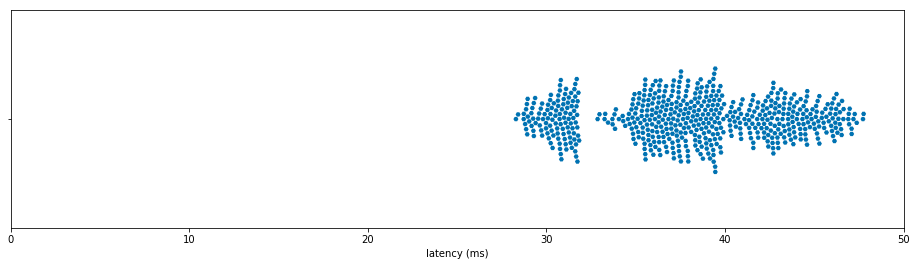

In [26]:
plt.figure(figsize=[PLOT_WIDTH, PLOT_HEIGHT])

#ax = sns.pointplot((values["latency"]), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2, ax =axes)
#ax = sns.swarmplot((values["latency"]), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)
ax = sns.swarmplot(x=measurements, hue=None, palette="colorblind", dodge=True, marker="H",orient="h", alpha=1, zorder=0)

#plt.title("TEST")
plt.xlabel("latency (ms)")
plt.xlim(PLOT_X_MIN, PLOT_X_MAX)

axes = plt.gca()

#plt.savefig(get_image_filename(filename), dpi=PLOT_OUTPUT_DPI)

In [6]:
DATA_PATH = "./"
ITERATIONS = ["_1","_2","_3","_4","_5"]

#Device Arrays as needed for plotting

#All Devices
DEVICES_ALL = ["6312kw", "adns5700", "apple1152","arduino", "bt58", "diamondback", "dragonrise_black",
               "dragonrise_green", "dualshock3_wired", "dualshock4_wired", "dualshock4_wireless",
               "exxter", "g15", "g300", "g5", "g700_wired", "g700_wireless", "g9", "gembird", "intelli_new",
               "intelli_og", "k120", "logilink0043", "nixdorf", "nvidiashield", "nvidiashield_wireless",
               "px1800", "rapoo", "rival", "roccat", "rx250", "sigma", "sk9620", "sunplus", "tramani_wired",
               "trust_oni_wireless", "unicomp", "wingman", "xbox360_wired", "xbox360_wireless", "xboxone_wireless"]

#Only Mice (ordered)
DEVICES_MICE = ["g5","g300","g700_wired", "g9", "intelli_new","diamondback","rival","bt58",
                "rx250","sunplus","intelli_og","logilink0043","apple1152", "adns5700"]

#Only Keyboards (ordered)
DEVICES_KEYBOARDS = ["px1800","roccat","sk9620","nixdorf","unicomp","sigma","k120","exxter","g15","gembird", "6312kw"]

#Only Gamepads excluding arduino (ordered)
DEVICES_GAMEPADS = ["wingman","dualshock4_wireless","nvidiashield","dualshock4_wired","xbox360_wired","xboxone_wireless","dualshock3_wired",
                    "nvidiashield_wireless","xbox360_wireless","tramani_wired","dragonrise_green","dragonrise_black"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRED = ["dragonrise_green","wingman","dragonrise_black","dualshock4_wired",
                          "tramani_wired","dualshock3_wired","xbox360_wired","nvidiashield"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRELESS= ["xboxone_wireless", "xbox360_wireless","nvidiashield_wireless"]

DEVICES_WITH_SPECIAL_DATA =["g9", "unicomp", "dualshock3_wired"]

DEVICES_WW =["g700_wired", "g700_wireless","nvidiashield", "nvidiashield_wireless","xbox360_wired", "xbox360_wireless"]


#Devices with odd Data
#DEVICES = ["diamondback", "exxter", "arduino"]


#TODO xbox360_wired polling rate
POLLING_RATES = {"6312kw" : 10, "adns5700" : 10, "apple1152" : 10, "arduino" : 1, 
                 "bt58" : 10, "diamondback" : 10, "dragonrise_black" : 10, "dragonrise_green" : 10, 
                 "dualshock3_wired" : 1, "dualshock4_wired" : 5, "dualshock4_wireless" : -1, "exxter" : 10, 
                 "g15" : 24, "g300" : 1, "g5" : 1, "g9": 10, "g700_wired" : 1, "g700_wireless" : -1, "gembird" : 10, 
                 "intelli_new" : 1, "intelli_og" : 10, "k120" : 10, "logilink0043" : 10, "nixdorf" : 10, 
                 "nvidiashield" : 1, "nvidiashield_wireless" : -1, "px1800" : 10, "rapoo" : -1, "rival" : 1, 
                 "roccat" : 1, "rx250" : 10, "sigma" : 10, "sk9620" : 10, "sunplus" : 10, 
                 "tramani_wired" : 10, "trust_oni_wireless" : 10, "unicomp" : 10, "wingman" : 10, 
                 "xbox360_wired" : 4, "xbox360_wireless" : 4, "xboxone_wireless" : -1}

DEVICE_NAMES ={"6312kw" : "Acer 6312-KW (PS/2)", "adns5700" : "Microsoft Optical Mouse 200", "apple1152" : "Apple A1152",
               "arduino" : "Arduino Micro","bt58" : "Logitech Premium Optical Wheel Mouse",
               "diamondback" : "Razor Diamondback","dragonrise_black" : "Speedlink Strike (Black)",
               "dragonrise_green" : "Speedlink Strike (Green)", "dualshock3_wired" : "Sony Dualshock 3",
               "dualshock4_wired" : "Sony Dualshock 4", "dualshock4_wireless" : "Sony Dualshock 4 wireless",
               "exxter" : "Exxter KE-200", "g15" : "Logitech G15", "g300" : "Logitech G300", "g5" : "Logitech G5",
               "g9" : "Logitech G9","g700_wired" : "Logitech G700", "g700_wireless" : "Logitech G700", "gembird" : "Gembird", 
               "intelli_new" : "Microsoft Intellimouse", "intelli_og" : "Microsoft Classic Intellimouse (PS/2)", 
               "k120" : "Logitech K120", "logilink0043" : "LogiLink ID0043", "nixdorf" : "Siemens Nixdorf (PS/2)", 
               "nvidiashield" : "nVidia Shield Gamepad", "nvidiashield_wireless" : "nVidia Shield Gamepad wireless", "px1800" : "PX-1800",
               "rapoo" : "Rapoo 6010B", "rival" : "Steel Series Rival Optical Mouse", "roccat" : "Roccat ISKU FX",
               "rx250" : "Logitech RX250", "sigma" : "Sigma", "sk9620" : "Acer SK-9620 (PS/2)", "sunplus" : "MS-TECH Laser Game Mouse",
               "tramani_wired" : "Tramani CT-P3000", "trust_oni_wireless" : "Trust Oni Wireless Micro Mouse",
               "unicomp" : "Unicomp Endura Pro", "wingman" : "Logitech Wingman", "xbox360_wired" : "XBox 360",
               "xbox360_wireless" : "XBox 360 wireless", "xboxone_wireless" : "XBox One Controller wireless"}

MODES = ["default_polling", "1ms_polling"]

all_raw_data = []

#print(os.system("ls"))
DEVICES = DEVICES_WITH_SPECIAL_DATA
for device in DEVICES:
    for mode in MODES:
        for iteration in ITERATIONS:
            if mode == "default_polling":
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_0ms" + iteration +".csv"
                try:
                    #print(path)
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                currentFile["latency"]/=1000
                #label = POLLING_RATES[device]
                #if(label == -1):
                #    label = "unknown"
                #label = "default {}ms".format(label)
                
                currentFile["polling"] = "default"
                currentFile["pollingRate"] = POLLING_RATES[device]
            else:
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_1ms" + iteration +".csv"
                try:
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                currentFile["latency"]/=1000
                #currentFile["polling"] = "forced 1ms"
                currentFile["polling"] = "forced"
                currentFile["pollingRate"] = 1
            #print(type(currentFile))
            #print(len(currentFile))
            #print(currentFile)
            
            # vllt später
            #if(currentFile["pollingRate"] == -1):
            #    currentFile["pollingRate"] = "unknown"
            
            all_raw_data.append(currentFile)
all_data = pd.concat(all_raw_data)
#all_data["latency (ms)"] = all_data["latency (s)"] * 1000.0

In [7]:
sns.set_style("whitegrid")

sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 2.5})

C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false'

g9
10 ms
forced:
3.91
0.60
default:
11.30
2.62



C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false'

unicomp
10 ms
forced:
11.24
2.83
default:
11.79
3.17



C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false'

dualshock3_wired
1 ms
forced:
12.38
2.99
default:
12.28
2.99



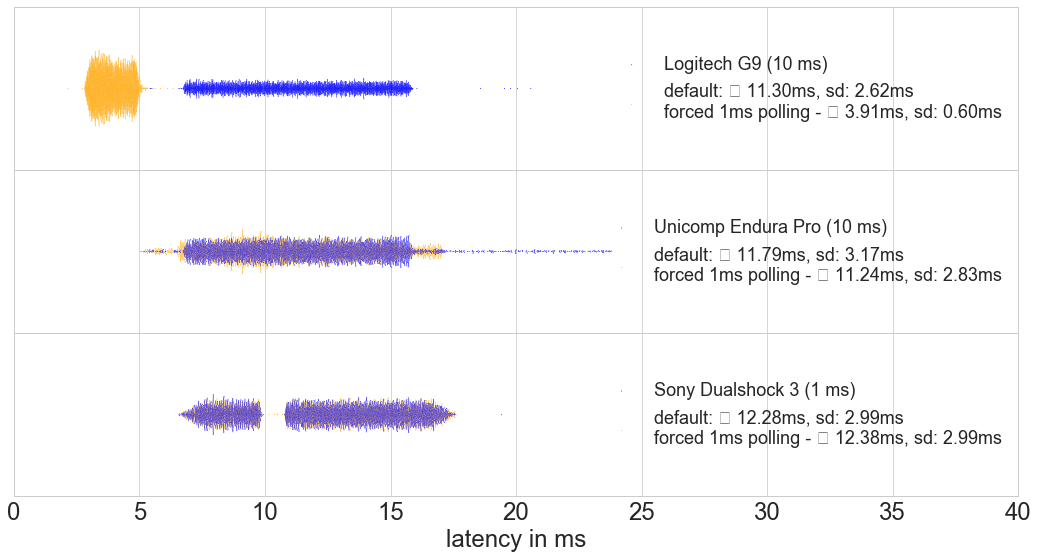

In [8]:
i = 0

import os
MAX_LATENCY = 100000 # microseconds

fig, axes = plt.subplots(len(DEVICES), 1, sharex =True)

#Here you can adjust the space between the subplots; value .001 results in no space between plots
plt.subplots_adjust(hspace = .001)
plt.rc('ytick', labelsize=24)
plt.xlabel('',fontsize=24)
fig.set_figheight(3 * len(DEVICES))
fig.set_figwidth(18)


poll_nice = {1: "1 ms", 4: "4 ms", 10: "10 ms", 24: "24 ms", -1: "n/a", 5: "5 ms"}

for device in DEVICES:
    
    
    #values_default = all_data[(all_data["device"] == DEVICES[i]) & ("default" in all_data["polling"])]
    values = all_data[((all_data["device"]) == DEVICES[i])]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i]) & (all_data["polling"] != "default_polling")]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i])]
       
    values_default = values[values["latency"]<=MAX_LATENCY]
    values_default = values_default[values_default["polling"] == "default"]
    
    values_forced = values[values["latency"]<=MAX_LATENCY]
    values_forced = values_forced[values_forced["polling"] == "forced"]
    
    #values_default = values_default[values_default["polling"]("default")]
    #values_forced = values_forced[(values_forced["latency"]<=MAX_LATENCY) & ("default" not in values_forced["polling"])] 
    
    
    # plt.title(DEVICE_NAMES[device])
    #swarmi_default = sns.swarmplot((values_default["latency"]/1000), values_default["polling"], color="b", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=1, ax=axes[i])
    #swarmi_forced = sns.swarmplot((values_forced["latency"]/1000), values_forced["polling"], color="orange", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, ax=axes[i])
    
    swarmi_default = sns.swarmplot((values_default["latency"]), color="b", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=1, ax=axes[i])
    swarmi_forced = sns.swarmplot((values_forced["latency"]), color="orange", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, ax=axes[i])
    
    
    swarmi_forced.set_xlim(0, 40)
    swarmi_default.set_xlim(0, 40)
    
    
    #Useless in current Version (5.1.2019)??
    swarmi_forced.set(xlabel="", ylabel="")
    swarmi_default.set(xlabel="latency in ms", ylabel="")
    
    plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='off', labelbottom='on')
    
    
    #Additional Information in each plot; additional information can also be added in this legend
    #axes[i].text(26,-0.1, DEVICE_NAMES[device], fontsize=24)
    #axes[i].text(26, 0.2, poll_nice[POLLING_RATES[device]], fontsize=24)
    #axes[i].legend(labels=("{}\n{}\n{}".format("test1", "ululululu", "asdf")), fontsize = 14, loc=0)
    #print(values_default["latency"][:3])
    #print(values_forced["latency"][:3])
    axes[i].legend(("{} ({})".format(DEVICE_NAMES[device], poll_nice[POLLING_RATES[device]]), "default: ⌀ {:.2f}ms, sd: {:.2f}ms\nforced 1ms polling - ⌀ {:.2f}ms, sd: {:.2f}ms".format(np.mean(values_default["latency"]), np.std(values_default["latency"]), np.mean(values_forced["latency"]), np.std(values_forced["latency"]))), fontsize = 18, loc=7)
    
    #DEVICE_NAMES[device],poll_nice[POLLING_RATES[device]],"{:.2f}".format(np.mean(values["latency"]))), fontsize = 24, loc=7)
    #axes[i].legend.get_texts().set_ha("right")
    
    
    
    i = i+1
    
    
    
    #plt.savefig("png/{}alpha1.png".format(DEVICE_NAMES[device]), dpi=600)
    
    print(device)
    print(poll_nice[POLLING_RATES[device]])
    print("forced:")
    print("{:.2f}".format(np.mean(values_forced["latency"])))
    print("{:.2f}".format(np.std(values_forced["latency"])))
    print("default:")
    print("{:.2f}".format(np.mean(values_default["latency"])))
    print("{:.2f}".format(np.std(values_default["latency"])))
    print("")
    #print("{:.2f}".format(np.sd(values["latency"])))
    # automatically print it - use carefully!
    #os.system("lp png/{}.png".format(device))
    
    #plt.close(fig)
    
    #swarmi_forced.set(xlabel='latency in ms', ylabel="")   
    
#plt.savefig("png/all_keyboards.png", dpi=300)
#plt.savefig("svg/all_keyboards.svg", dpi=300)


In [9]:
def plot_multi(data1,data2, plot_file_names=False):
    fig, axes = plt.subplots(ncols=7, sharey=True)
    fig.set_figheight(16)
    fig.set_figwidth(16)
    plt.subplots_adjust(wspace = 0.05)
    axes[0].set_ylim(0,25)
    #for renaming axes 
    #axes[0].set_yticklabels([])
    
    
    #axes[0].set_axis_on()
    
    data_combined=[data1["latency"],data2["latency"]]
    
    # barplots
    sns.barplot(data=(data_combined), ci=95, n_boot=1000, units=None, orient=None, color='grey',ax=axes[0])
    axes[0].set_title("barplot")
    axes[0].set_ylabel("latency in ms")
    
    # boxplots    
    sns.boxplot(data=data_combined, color='grey', saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, ax=axes[1])    
    axes[1].set_title("boxplot")
    
    #violinplots
    sns.violinplot(data=data_combined, scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, linewidth=None, color='grey', saturation=0.75, ax=axes[2])
    axes[2].set_title("violinplot")
   
    # distplots
    sns.distplot(data1["latency"],rug=False,color='grey', ax=axes[3], vertical=True, axlabel=False)
    sns.distplot(data2["latency"],color='black', ax=axes[4], vertical=True, axlabel=False)
    axes[3].set_title("histplot 1")
    axes[4].set_title("histplot 2")
    axes[3].invert_xaxis()
  
    #swarmplot
    sns.swarmplot(data1["latency"], hue=None, color='black', size=1, dodge=True, marker="H",orient="v", alpha=1, ax =axes[5])
    axes[5].set_title("swarmplot 1")
    
    sns.swarmplot(data2["latency"], hue=None, color='000000', size=1, dodge=True, marker="H",orient="v", alpha=1, ax =axes[6])
    axes[6].set_title("swarmplot 2")
    
    axes[0].set_xticklabels([])
    axes[1].set_xticklabels([])
    axes[2].set_xticklabels([])
    axes[3].set_xticklabels([])
    axes[4].set_xticklabels([])
    
    axes[5].set_ylabel('')
    axes[6].set_ylabel('')
    
    
    
    #savefiles
    plt.savefig("png/different_visualisations.png", dpi=300)
    plt.savefig("svg/different_visualisations.svg", dpi=300)
  
    plt.show()

C:\Users\Laptop\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Laptop\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Laptop\Anaconda3\lib\site-packages\numpy\lib\histograms.py:815: RuntimeWarning: invalid value encountered in t

FileNotFoundError: [Errno 2] No such file or directory: 'png/different_visualisations.png'

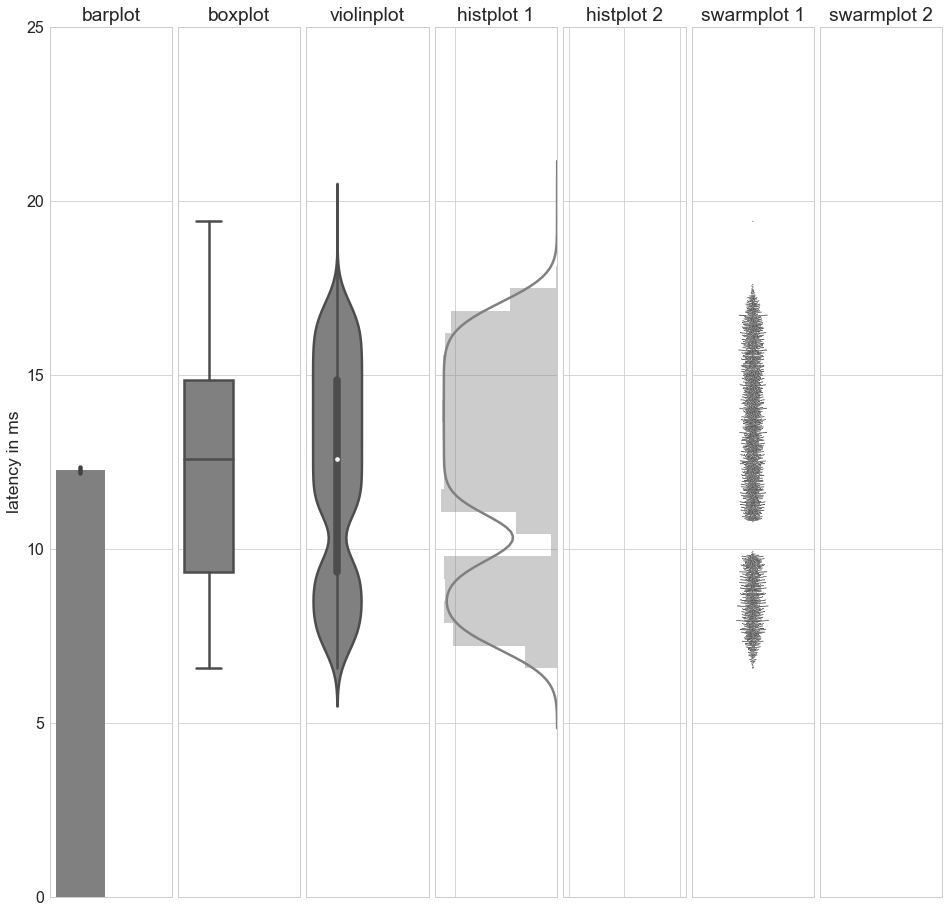

In [10]:
multiplotdevice1 = all_data[((all_data["device"]) == "dualshock3_wired") & ((all_data["polling"]) == "default")]
multiplotdevice2 = all_data[((all_data["device"]) == "dualshock4_wired") & ((all_data["polling"]) == "default")]

sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})


plot_multi(multiplotdevice1, multiplotdevice2)

In [ ]:
#ab hier nur kurze Experimente

In [ ]:
all_data

In [ ]:
i = 0

import os
MAX_LATENCY = 100000 # microseconds

poll_nice = {1: "1 ms", 4: "4 ms", 10: "10 ms", 24: "24 ms", -1: "n/a", 5: "5 ms"}

for device in DEVICES:
    
    values = all_data[((all_data["device"]) == DEVICES[i])]
       
    values_default = values[values["latency"]<=MAX_LATENCY]
    values_default = values_default[values_default["polling"] == "default"]
    
    values_forced = values[values["latency"]<=MAX_LATENCY]
    values_forced = values_forced[values_forced["polling"] == "forced"]

    values_forced = values_forced[(values_forced["latency"]<=MAX_LATENCY) & ("default" not in values_forced["polling"])] 
    
    #print(values_default)
    
    
    i = i+1
 
    print(device)
    

In [ ]:
values = all_data[(all_data["device"]) == "diamondback"]

plt.title(device)

ax = sns.pointplot((values["latency"]), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2, ax =axes)
ax = sns.swarmplot((values["latency"]), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

In [ ]:
values = all_data[(all_data["device"] == "g9")]
pr


plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

plt.title(DEVICE_NAMES["g9"])
plt.xlabel("latency (ms)")
plt.xlim(0, 20)

axes = plt.gca()
#axes.set_xlim(0,100)

g9
unicomp
dualshock3_wired


FileNotFoundError: [Errno 2] No such file or directory: 'svg/allDevices.svg'

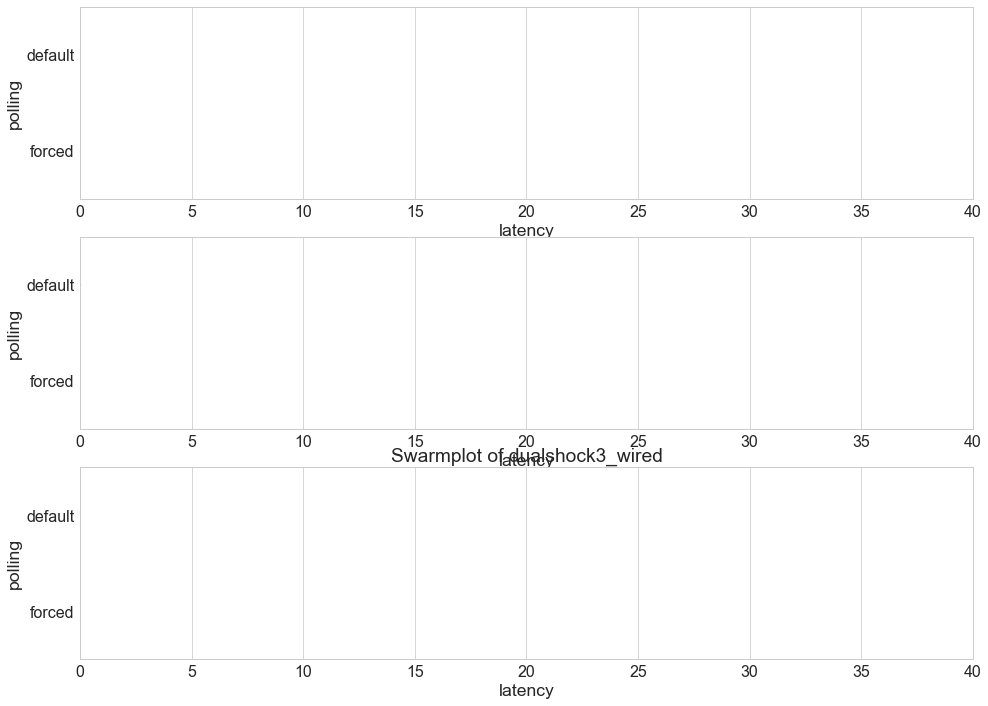

In [11]:
#Plotting all devices in one picture
i = 0

#plt.xlim(0, 80)
fig, axes = plt.subplots((len(DEVICES)), 1)


fig.set_figheight(4 * len(DEVICES))
fig.set_figwidth(16)

#fig(xlim = [0,80])


#axes.set_xlabel("latency (ms)")
#axes = plt.gca()
#axes.set_xlim([0,80])



for device in DEVICES:
    values = all_data[(all_data["device"]) == DEVICES[i]]

    plt.title('Swarmplot of '+ device)
    #sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set2",size=1,orient="h",alpha=1, ax=axes[i])    
    
    #point_plot = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, ax=axes[i], capsize=.2)
    swarm_plot = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, edgecolors='w', ax=axes[i])

    POLLING_RATES[device]
    
    axes[i].set_xlim(0, 40)
    i = i+1
    print(device)


plt.savefig("svg/allDevices.svg")
plt.savefig("png/allDevices.png")

In [ ]:
#Plotting a single swarmplot
values = all_data[(all_data["device"] == "g9")]

plt.figure(figsize=[16, 8])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()

ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set1", size=1,marker ="H", orient="h", alpha=1)
#ax = sns.violinplot((values["latency"]/1000), values["polling"], inner=None, palette="Set2", split=True )
plt.xlabel("latency (ms)")
plt.xlim(0, 100)

#axes = plt.gca()
#axes.set_xlim(0,100)

In [ ]:
MAX_LATENCY = 100000 # microseconds
values = all_data[(all_data["device"]) == "diamondback"]
values = values[values["latency"]<=MAX_LATENCY]
plt.title('Swarmplot of '+ device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

#plt.savefig("svg/test1.svg")
#plt.savefig("png/test1.png")